In [2]:
#TODO here wrong model (with genre embeddings)
import json
import os

from file_count import print_files_stats, get_files_number
from model_helper import build_vocab
from midi import generate_word_files

DATA_PATH = r"C:\projects\studia\POLSLrepo_sem7\music_generator\data\midi"
TEST_PATH = r"C:\projects\studia\POLSLrepo_sem7\music_generator\data\midi\test"
TRAIN_PATH = r"C:\projects\studia\POLSLrepo_sem7\music_generator\data\midi\train"

In [ ]:
print_files_stats(TEST_PATH)
print_files_stats(TRAIN_PATH)

test_files_by_genre = {}
for dir in os.listdir(TEST_PATH):
    test_files_by_genre[dir] = get_files_number(os.path.join(TEST_PATH, dir))[0]
print (test_files_by_genre)

train_files_by_genre = {}
for dir in os.listdir(TRAIN_PATH):
    train_files_by_genre[dir] = get_files_number(os.path.join(TRAIN_PATH, dir))[0]
print (train_files_by_genre)

for genre in train_files_by_genre.keys():
    print(f"{genre} ratio: {float(test_files_by_genre[genre])/float(train_files_by_genre[genre]+test_files_by_genre[genre])}")


C:\projects\studia\POLSLrepo_sem7\music_generator\data\midi\test
Total number of files: 884
Number of files by extension:
  .mid: 884
C:\projects\studia\POLSLrepo_sem7\music_generator\data\midi\train
Total number of files: 7915
Number of files by extension:
  .mid: 7915
{'Ambient': 16, 'Blues': 16, 'Classical': 133, 'Country': 26, 'Electronic': 19, 'Folk': 8, 'Jazz': 54, 'Latin': 29, 'Pop': 76, 'Rap': 20, 'Rock': 300, 'Soul': 36, 'Soundtracks': 101, 'World': 50}
{'Ambient': 169, 'Blues': 113, 'Classical': 1265, 'Country': 220, 'Electronic': 142, 'Folk': 82, 'Jazz': 438, 'Latin': 224, 'Pop': 674, 'Rap': 138, 'Rock': 2836, 'Soul': 315, 'Soundtracks': 846, 'World': 453}
Ambient ratio: 0.08648648648648649
Blues ratio: 0.12403100775193798
Classical ratio: 0.09513590844062947
Country ratio: 0.10569105691056911
Electronic ratio: 0.11801242236024845
Folk ratio: 0.08888888888888889
Jazz ratio: 0.10975609756097561
Latin ratio: 0.11462450592885376
Pop ratio: 0.10133333333333333
Rap ratio: 0.12658

In [7]:
print("Words files generation start")
generate_word_files(TEST_PATH)
generate_word_files(TRAIN_PATH)
print("Words files generation end")

Words files generation start
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Error processing C:\projects\studia\POLSLrepo_sem7\music_generator\data\midi\train\Classical\Classical\Claude Debussy\Clair De Lune.mid: badly formatted midi bytes, got: b''
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee
Percussion detected eeeeeeeeeeeeeeeee

In [10]:
print_files_stats(DATA_PATH)

C:\projects\studia\POLSLrepo_sem7\music_generator\data\midi
C:\projects\studia\POLSLrepo_sem7\music_generator\data\midi\test\Ambient\Calming Instrumental\Elisa
C:\projects\studia\POLSLrepo_sem7\music_generator\data\midi\test\Ambient\Calming Instrumental\Elisa
C:\projects\studia\POLSLrepo_sem7\music_generator\data\midi\test\Ambient\Easy Listening\Richard Clayderman
C:\projects\studia\POLSLrepo_sem7\music_generator\data\midi\test\Ambient\Easy Listening\Richard Clayderman
C:\projects\studia\POLSLrepo_sem7\music_generator\data\midi\test\Ambient\Easy Listening\Richard Clayderman
C:\projects\studia\POLSLrepo_sem7\music_generator\data\midi\test\Ambient\Easy Listening\Richard Clayderman
C:\projects\studia\POLSLrepo_sem7\music_generator\data\midi\test\Ambient\Easy Listening\Richard Clayderman
C:\projects\studia\POLSLrepo_sem7\music_generator\data\midi\test\Ambient\Easy Listening\Richard Clayderman
C:\projects\studia\POLSLrepo_sem7\music_generator\data\midi\test\Ambient\Focus\Gordon
C:\projects\

In [12]:
word_to_idx, idx_to_word = build_vocab(DATA_PATH)
genre_to_idx = {
    genre: idx for idx, genre in enumerate(sorted(os.listdir(TRAIN_PATH)))
}
vocab_size = len(word_to_idx)
genre_size = len(genre_to_idx)

In [13]:
with open("word_to_idx.json", "w") as f:
    json.dump(word_to_idx, f)
with open("genre_to_idx.json", "w") as f:
    json.dump(genre_to_idx, f)

[268, 119, 640, 358, 331, 138, 661, 367, 1126, 248, 4763, 499, 1401, 791]
{'Ambient': 268, 'Blues': 119, 'Classical': 640, 'Country': 358, 'Electronic': 331, 'Folk': 138, 'Jazz': 661, 'Latin': 367, 'Pop': 1126, 'Rap': 248, 'Rock': 4763, 'Soul': 499, 'Soundtracks': 1401, 'World': 791}


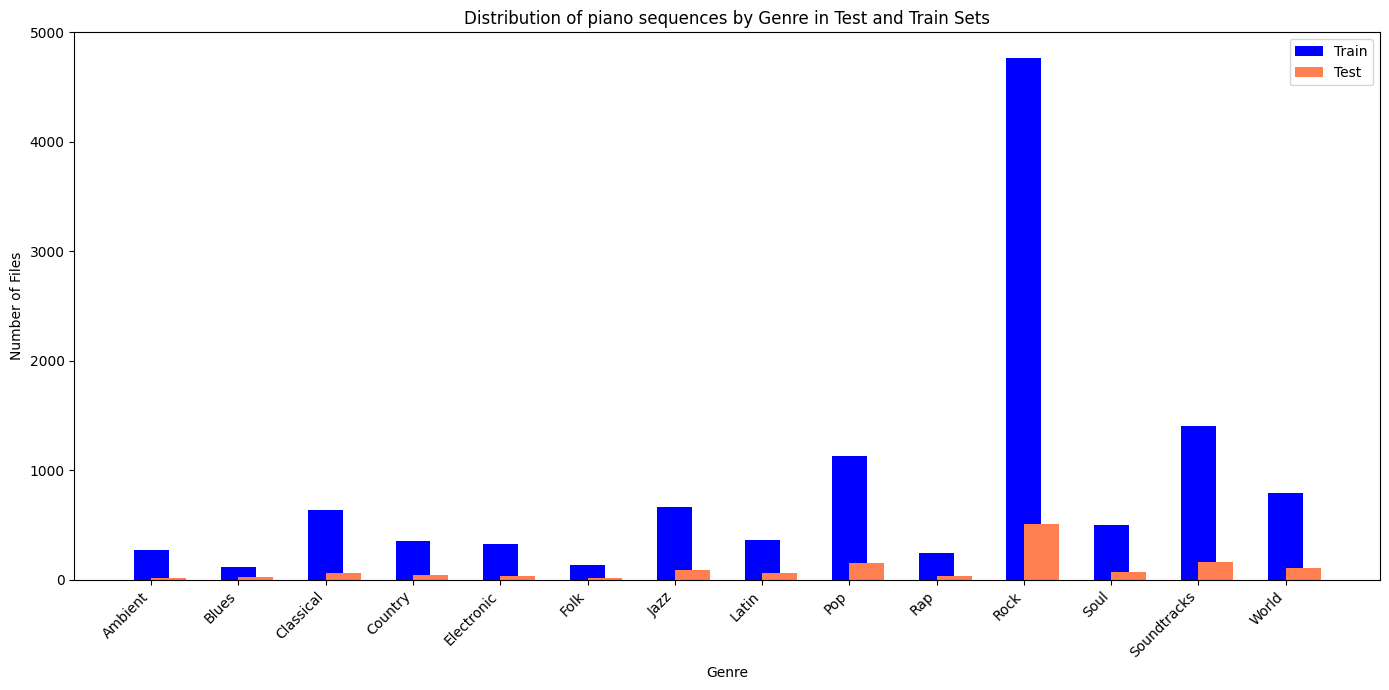

In [4]:
import matplotlib.pyplot as plt
import os
import glob

train_files_by_genre = dict()

for f in glob.glob(f"{TRAIN_PATH}/**/*piano*.txt", recursive=True):
    # Extract the genre name (first folder after ready_midi)
    relative_path = os.path.relpath(f, TRAIN_PATH)  # Get relative path
    genre = relative_path.split(os.sep)[0]  # Extract the first folder (genre)

    # Count the tracks by genre
    if genre not in train_files_by_genre:
        train_files_by_genre[genre] = 0
    train_files_by_genre[genre] += 1

test_files_by_genre = dict()

for f in glob.glob(f"{TEST_PATH}/**/*piano*.txt", recursive=True):
    # Extract the genre name (first folder after ready_midi)
    relative_path = os.path.relpath(f, TEST_PATH)  # Get relative path
    genre = relative_path.split(os.sep)[0]  # Extract the first folder (genre)

    # Count the tracks by genre
    if genre not in test_files_by_genre:
        test_files_by_genre[genre] = 0
    test_files_by_genre[genre] += 1
# for dir in os.listdir(TEST_PATH):
#     test_files_by_genre[dir] = get_files_number(os.path.join(TEST_PATH, dir))[1][".txt"]
# print (test_files_by_genre)

# train_files_by_genre = {}
# for dir in os.listdir(TRAIN_PATH):
#     files_num = get_files_number(os.path.join(TRAIN_PATH, dir))
#     train_files_by_genre[dir] = files_num[1][".txt"]
# print (train_files_by_genre)

genres = sorted(set(test_files_by_genre.keys()).union(train_files_by_genre.keys()))
test_counts = [test_files_by_genre.get(genre, 0) for genre in genres]
train_counts = [train_files_by_genre.get(genre, 0) for genre in genres]

print(train_counts)
print(train_files_by_genre)

# Plot the distribution
plt.figure(figsize=(14, 7))
x = range(len(genres))

plt.bar(x, train_counts, width=0.4, label="Train", color="blue", align='center')
plt.bar(x, test_counts, width=0.4, label="Test", color="coral", align='edge')

plt.xlabel("Genre")
plt.ylabel("Number of Files")
plt.title("Distribution of piano sequences by Genre in Test and Train Sets")
plt.xticks(x, genres, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()